**CSCE 5300- Introduction to Big Data**

Assignment 3

Name: Asish Inuganti

Student ID: 11651183

In [1]:
from  google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


data_tb_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/.csv')
data_tb_set.head()

In [ ]:

data_tb_set.rename(columns={'binaryClass':'Label'},inplace=True)

In [ ]:

data_tb_set.replace('?',np.nan,inplace=True)

In [ ]:

data_tb_set.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [ ]:
data_tb_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [ ]:


cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    data_tb_set[i] = pd.to_numeric(data_tb_set[i])

In [ ]:

data_tb_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


In [ ]:

data_tb_set.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [ ]:

miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    data_tb_set[i] = data_tb_set[i].fillna(data_tb_set[i].mean())

In [ ]:

data_tb_set.dropna(inplace=True)

In [ ]:

data_tb_set.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [ ]:
data_tb_set = data_tb_set.drop(1364)

In [ ]:

data_tb_set.TT4 = data_tb_set.TT4.astype(int)
data_tb_set.FTI = data_tb_set.FTI.astype(int)
data_tb_set.age = data_tb_set.age.astype(int)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

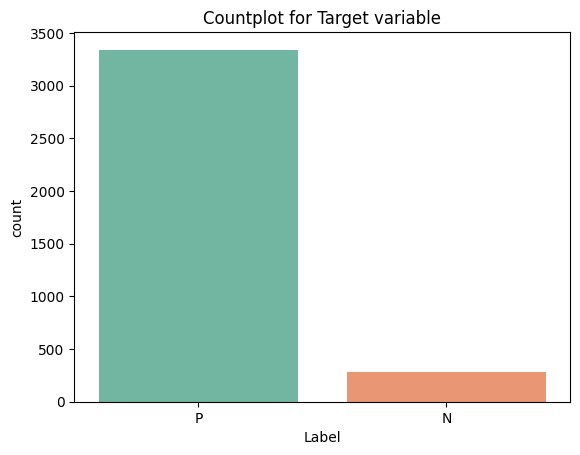

In [ ]:

sns.countplot(x='Label',data=data_tb_set,palette = "Set2")
plt.title("Countplot for Target variable")
plt.show()

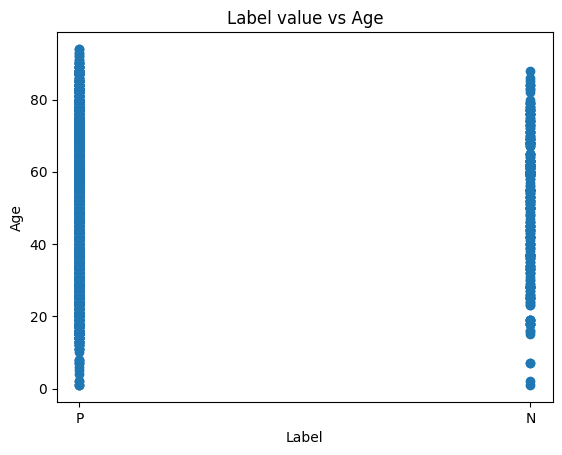

In [ ]:
plt.scatter(data_tb_set["Label"], data_tb_set['age'])
plt.xlabel('Label')
plt.ylabel('Age')
plt.title('Label value vs Age')
plt.show()


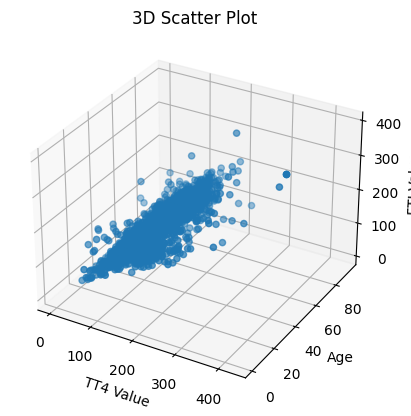

In [ ]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()


ax = fig.add_subplot(projection='3d')


ax.scatter(data_tb_set["TT4"], data_tb_set['age'], data_tb_set['FTI']  )


ax.set_xlabel('TT4 Value')
ax.set_ylabel('Age')
ax.set_zlabel('FTI Value')


ax.set_title('3D Scatter Plot')


plt.show()


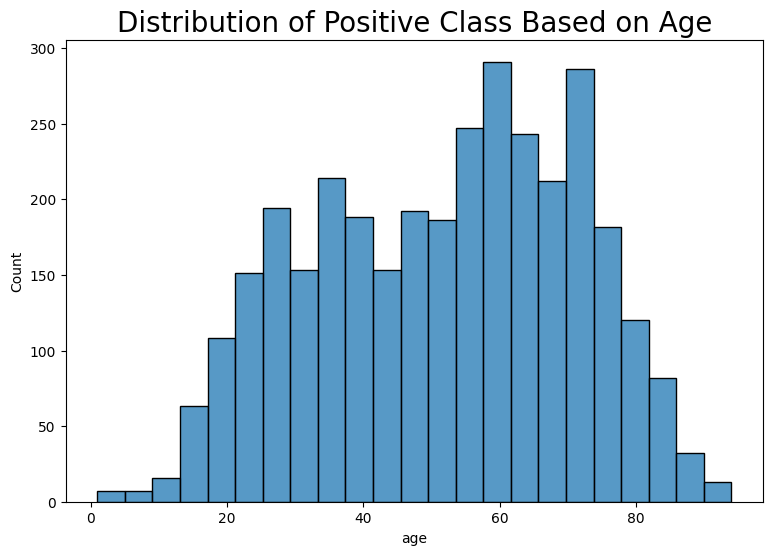

In [ ]:

positive_df = data_tb_set[data_tb_set.Label=='P']

plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,)
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});